# Лабораторная работа: кластеризация

## Разделение изображения на семантические компоненты

Загрузите изображение

In [1]:
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


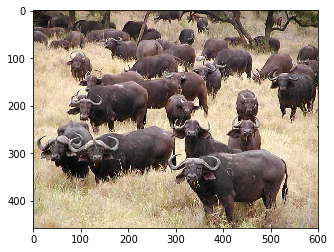

In [4]:
img1 = imread(u'данные/1.jpg')
fig = plt.figure()
plt.imshow(img1)

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


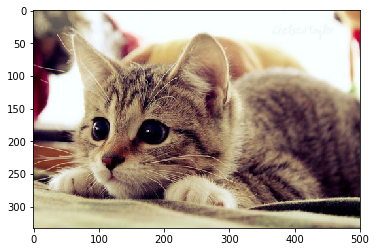

In [5]:
img2 = imread(u'данные/2.jpg')
fig = plt.figure()
plt.imshow(img2)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

In [6]:
from sklearn.cluster import KMeans

Рассмотрим выделение двух компонент
Для бизонов

In [7]:
X_img1 = []
lmbd = 1
for x in range(len(img1)):
    for y in range(len(img1[0])):
        X_img1_i = []
        X_img1_i.extend([x*lmbd, y*lmbd])
        X_img1_i.extend(img1[x][y])
        X_img1.append(X_img1_i)

In [8]:
kmeans = KMeans(n_clusters=2)
labels1 = kmeans.fit_predict(X_img1)

Для котика:

In [9]:
X_img2 = []
lmbd = 1
for x in range(len(img2)):
    for y in range(len(img2[0])):
        X_img2_i = []
        X_img2_i.extend([x*lmbd, y*lmbd])
        X_img2_i.extend(img2[x][y])
        X_img2.append(X_img2_i)

In [10]:
kmeans = KMeans(n_clusters=2)
labels2 = kmeans.fit_predict(X_img2)

**2. (0.5 балл)** Визуализируйте результаты сегментации.

In [11]:
def vizualize_segments(img, labels):
    n_components = max(labels) + 1
    for i in range(0, n_components):
        test_img = img.copy()
        for x in range(len(img)):
            for y in range(len(img[0])):
                if labels[x*len(img[0]) + y] != i:
                    test_img[x][y] = [255, 255, 255]
        fig = plt.figure()
        plt.imshow(test_img)

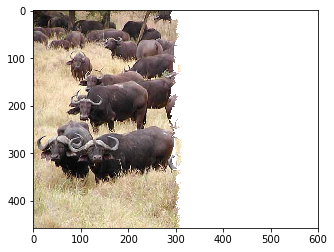

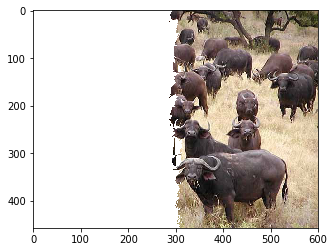

In [12]:
vizualize_segments(img1, labels1)

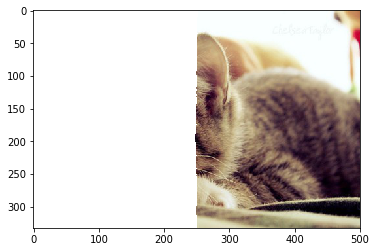

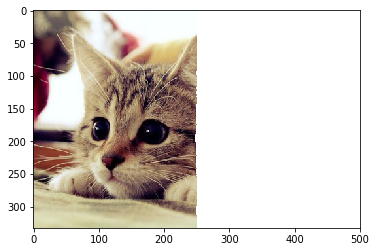

In [13]:
vizualize_segments(img2, labels2)

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

In [14]:
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [15]:
def rgb2gray(rgb):

    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [17]:
lena = imread(u'данные/1.jpg')
for x in range(len(lena)):
    for y in range(len(lena[0])):
        lena[x][y] = rgb2gray(lena[x][y])

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


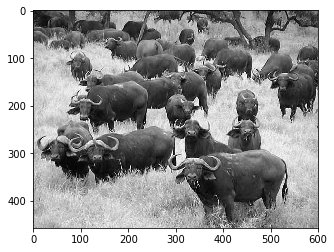

In [18]:
fig = plt.figure()
plt.imshow(lena)

In [19]:
from sklearn.preprocessing import normalize

In [20]:
lena.shape
lena = lena[::5, ::5, 0]
lena.shape
lena = normalize(lena)
# lena = lena[::5, ::5, 0]


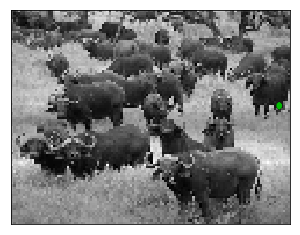

In [23]:
#lena = imread('data/bizon.jpg')
#lena = sp.misc.lena()
# Downsample the image by a factor of 4
# lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
# lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(lena)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / lena.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 2

###############################################################################
# Visualize the resulting regions


t0 = time.time()
labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                             assign_labels='kmeans')
t1 = time.time()
labels = labels.reshape(lena.shape)

plt.figure(figsize=(5, 5))
plt.imshow(lena,   cmap=plt.cm.gray)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
                colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
plt.xticks(())
plt.yticks(())
# plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()

(115, 150)


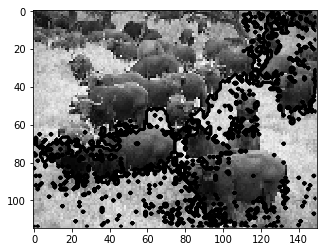

(84, 125)


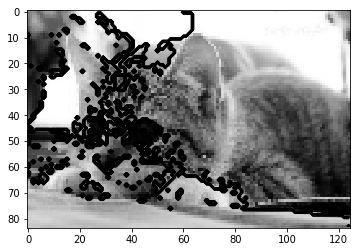

In [22]:
n_clusters = 3  
for img in [img1, img2]:
    img = img[::4, ::4]
    graph = image.img_to_graph(img.mean(axis=2))
    beta = 5
    eps = 1e-6
    graph.data = np.exp(-beta * graph.data / img.std()) + eps
    clustered1 = spectral_clustering(graph,n_clusters=n_clusters,assign_labels='kmeans')
    labels = clustered1.reshape(img.shape[:-1])
    print(labels.shape)
    for l in range(n_clusters):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / n_clusters), ])
    plt.imshow(img.mean(axis=-1),cmap="gray")
    plt.show()

**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


/Users/lizakorneeva/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


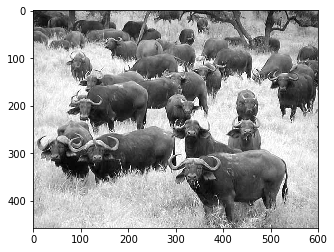

In [34]:
img = imread(r'data/bizon.jpg')[:,:,0]# матрица интенсивностей
plt.gray()
imgplot = plt.imshow(img)
plt.show()

**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?



In [35]:
from numpy.linalg import svd

In [36]:
u, s, vh = np.linalg.svd(img)

In [51]:
u.shape, s.shape, vh.shape

((458, 458), (458,), (600, 600))

In [53]:
def vizualize(img, start=0, end=img.shape[0]):
#     u, s, vh = np.linalg.svd(img)
    reconstimg = np.matrix(u[:,start:end]) * np.diag(s[start:end]) * np.matrix(vh[start:end, :])
    imgplot = plt.imshow(reconstimg)
    plt.show()

In [49]:
reconstimg = np.matrix(u[:,20:img.shape[0]]) * np.diag(s[20:img.shape[0]]) * np.matrix(vh[20:img.shape[0], :])

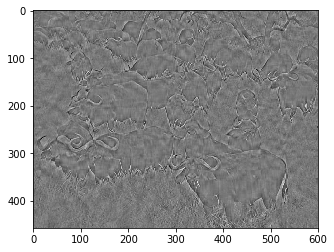

In [50]:
imgplot = plt.imshow(reconstimg)
plt.show()

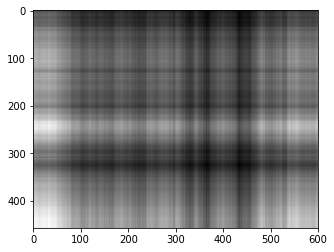

In [72]:
vizualize(img, 0, 1)

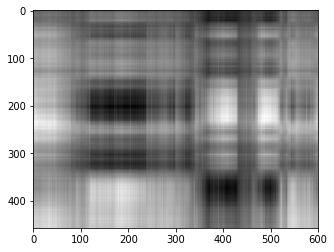

In [74]:
vizualize(img, 0, 2)

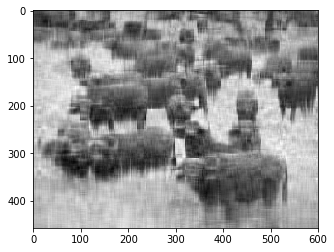

In [56]:
vizualize(img, 0, 20)

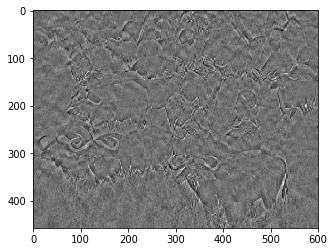

In [57]:
vizualize(img, 20, 100)

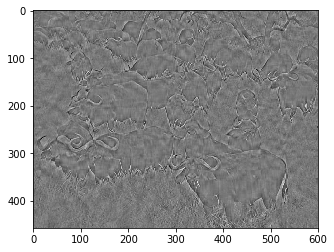

In [62]:
vizualize(img, 20)

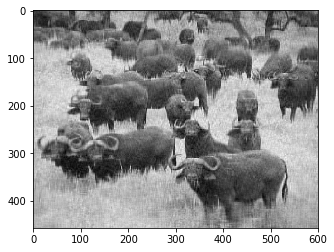

In [63]:
vizualize(img, 0, 50)

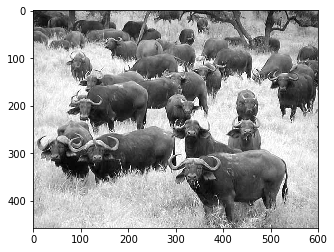

In [61]:
vizualize(img)

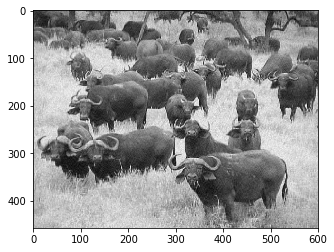

In [67]:
vizualize(img, 0, 100)

In [75]:
img = normalize(img)

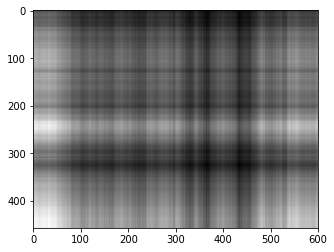

In [76]:
vizualize(img, 0, 1)